<a href="https://colab.research.google.com/github/abdulhaq555/Final-Year-Project/blob/main/Heart_Attack_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Attack Risk Prediction Using Clinical and Biochemical Indicators**

### **Overview**
This project aims to **predict the risk of heart attack** using patients’ clinical and biochemical data,
including attributes such as age, gender, blood pressure, glucose level, CK-MB enzyme, and troponin level.

The goal is to preprocess the dataset, perform exploratory data analysis (EDA),
and prepare the data for machine learning classification models.

**Dataset:** Heart Attack Data (collected from clinical sources and normalized)

**Libraries Used:** pandas, numpy, matplotlib, seaborn, scikit-learn, scipy


In [30]:

# Import Required Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy import stats

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted")


##  **Load the Dataset**

In this step, we load the heart attack dataset from the uploaded Excel file
and preview the first few rows to understand the data structure.


In [31]:

# Load Dataset


# For Google Colab: upload or mount file, then use path below
file_path = "/content/Heart attack data.xlsx"   # Change path if needed
data = pd.read_excel(file_path)

# Preview the data
print("Dataset Shape:", data.shape)
data.head()


Dataset Shape: (1323, 9)


,Age,Gender,Heart Rate,Pressure High,Pressure Low,Glucose,KCM,Troponin,Output
0,64.0,1.0,66.0,160.0,83.0,160.0,1.80,0.012,0.0
1,21.0,1.0,94.0,98.0,46.0,296.0,6.75,1.060,1.0
2,55.0,1.0,64.0,160.0,77.0,270.0,1.99,0.003,0.0
3,64.0,1.0,70.0,120.0,55.0,270.0,13.87,0.122,1.0
4,55.0,1.0,64.0,112.0,65.0,300.0,1.08,0.003,0.0


##  **Explore Basic Information**

This section provides:
- Dataset structure (`.info()`)
- Summary statistics (`.describe()`)
- Missing value count


In [32]:

# Dataset Overview


print("\n--- Dataset Info ---")
data.info()




--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            1321 non-null   float64
 1   Gender         1321 non-null   float64
 2   Heart Rate     1321 non-null   float64
 3   Pressure High  1321 non-null   float64
 4   Pressure Low   1321 non-null   float64
 5   Glucose        1321 non-null   float64
 6   KCM            1321 non-null   float64
 7   Troponin       1321 non-null   float64
 8   Output         1321 non-null   float64
dtypes: float64(9)
memory usage: 93.2 KB


In [33]:

print("\n--- Descriptive Statistics ---")
display(data.describe())



--- Descriptive Statistics ---


,Age,Gender,Heart Rate,Pressure High,Pressure Low,Glucose,KCM,Troponin,Output
count,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000
mean,56.195307,0.659349,75.943982,127.178653,72.305072,146.848372,15.478524,0.368194,0.613929
std,13.746835,0.474108,15.435198,26.340369,14.233817,75.711122,46.951999,1.185702,0.487032
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.650000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,170.000000,5.810000,0.086000,1.000000
max,103.000000,1.000000,135.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


In [34]:

print("\n--- Missing Values ---")
print(data.isnull().sum())


--- Missing Values ---
Age              2
Gender           2
Heart Rate       2
Pressure High    2
Pressure Low     2
Glucose          2
KCM              2
Troponin         2
Output           2
dtype: int64


##  **Handle Missing Values**

Missing values are imputed using the **mean strategy** for numerical features.
This ensures no missing data remains before training.


In [35]:

# Handle Missing Values


imputer = SimpleImputer(strategy='mean')
cols_to_impute = ['Age','Gender','Heart Rate', 'Pressure High', 'Pressure Low', 'Glucose', 'KCM', 'Troponin']
data[cols_to_impute] = imputer.fit_transform(data[cols_to_impute])

# Verify again
print("Missing values after imputation:\n", data.isnull().sum())


Missing values after imputation:
 Age              0
Gender           0
Heart Rate       0
Pressure High    0
Pressure Low     0
Glucose          0
KCM              0
Troponin         0
Output           2
dtype: int64


In [36]:
#  unique classes
print("Unique Output labels before encoding:", data['Output'].unique())


Unique Output labels before encoding: [ 0.  1. nan]


In [37]:
data = data.dropna(subset=['Output'])


print("Unique Output labels after cleaning:", data['Output'].unique())
print(data['Output'].value_counts())

Unique Output labels after cleaning: [0. 1.]
Output
1.0    811
0.0    510
Name: count, dtype: int64


##  **Encode Categorical Variables**

Convert the `Output` column (positive/negative) 1.into binary numeric labels:
- **1.0(positive) → 1**
- **0.0(negative) → 0**


In [38]:

# Encode Categorical Variables


label_encoder = LabelEncoder()
data['Output'] = label_encoder.fit_transform(data['Output'])

# Confirm encoding
data[['Output']].head()


,Output
0,0
1,1
2,0
3,1
4,0


##  **Outlier Detection and Removal**

Outliers are detected using the **Z-score method**.
Any data point with |Z| > 3 is considered an outlier and removed.


In [39]:

# Outlier Detection and Removal

numeric_cols = ['Age', 'Heart Rate', 'Pressure High', 'Pressure Low', 'Glucose', 'KCM', 'Troponin']
z_scores = np.abs(stats.zscore(data[numeric_cols]))

data = data[(z_scores < 3).all(axis=1)]

print("Dataset shape after removing outliers:", data.shape)


Dataset shape after removing outliers: (1198, 9)


##  **Feature Scaling (Normalization)**

Normalize all continuous features using **Min-Max Scaling** to the range [0, 1].
This ensures balanced feature influence during model training.


In [40]:

# Feature Scaling (Normalization)


scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Preview scaled data
data.head()


,Age,Gender,Heart Rate,Pressure High,Pressure Low,Glucose,KCM,Troponin,Output
0,0.625000,1.0,0.348837,0.683453,0.625000,0.375375,0.010056,0.002858,0
1,0.027778,1.0,0.674419,0.237410,0.111111,0.783784,0.043711,0.275136,1
2,0.500000,1.0,0.325581,0.683453,0.541667,0.705706,0.011348,0.000520,0
3,0.625000,1.0,0.395349,0.395683,0.236111,0.705706,0.092121,0.031437,1
4,0.500000,1.0,0.325581,0.338129,0.375000,0.795796,0.005160,0.000520,0


##  **Exploratory Data Analysis (EDA)**

In this step, we visualize:
- Distribution of the target variable
- Correlations among features
- Gender-based heart attack trends
- Boxplots for feature vs. outcome


/tmp/ipython-input-1406271367.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Output', data=data, palette="coolwarm")


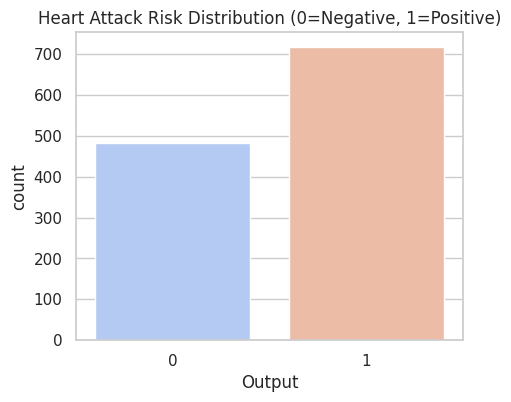

In [41]:

# EDA - Distribution & Correlation

# Output distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Output', data=data, palette="coolwarm")
plt.title('Heart Attack Risk Distribution (0=Negative, 1=Positive)')
plt.show()



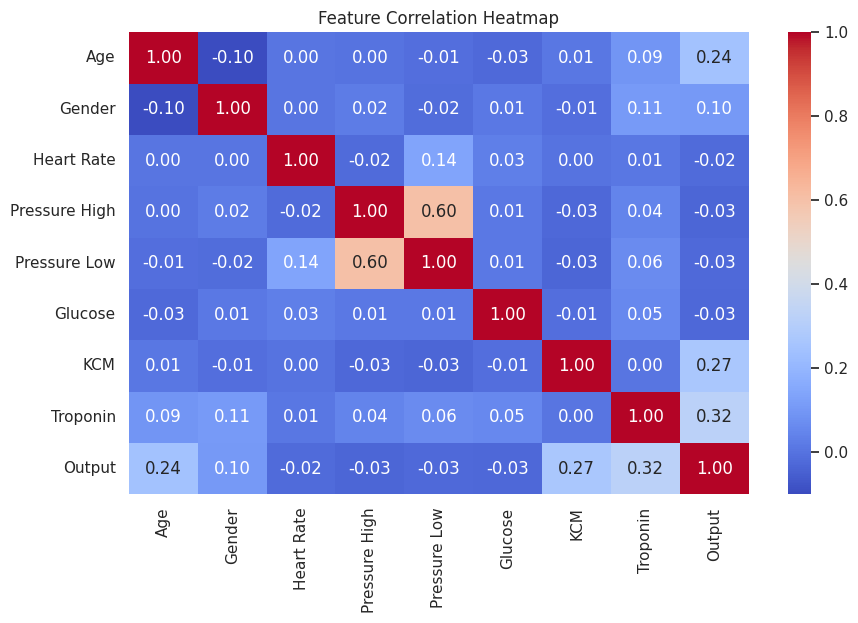

In [42]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

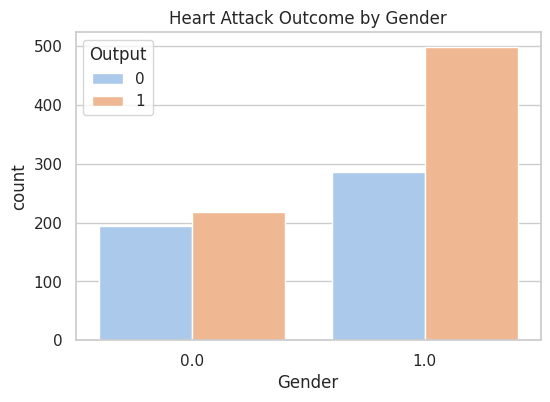

In [43]:

# Gender vs Outcome and Boxplots

# Gender vs Output
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Output', data=data, palette='pastel')
plt.title('Heart Attack Outcome by Gender')
plt.show()



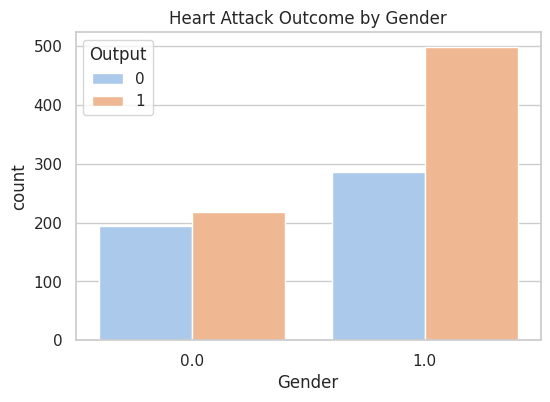

/tmp/ipython-input-1340770349.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Output', y=col, data=data, palette="husl")


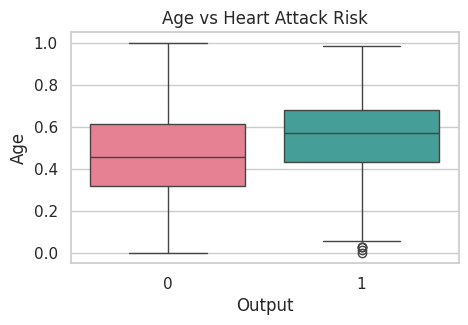

/tmp/ipython-input-1340770349.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Output', y=col, data=data, palette="husl")


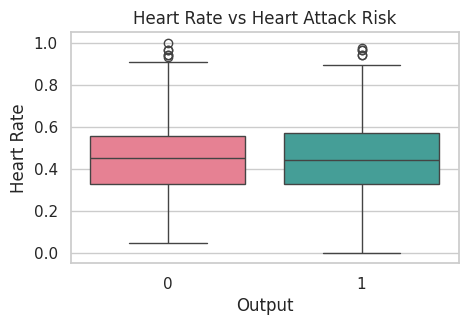

/tmp/ipython-input-1340770349.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Output', y=col, data=data, palette="husl")


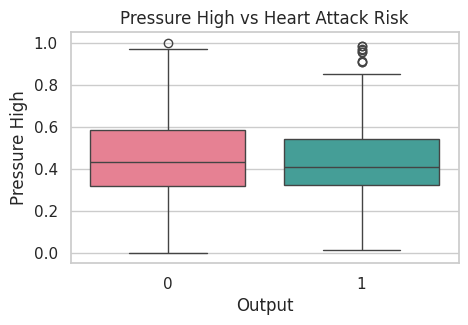

/tmp/ipython-input-1340770349.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Output', y=col, data=data, palette="husl")


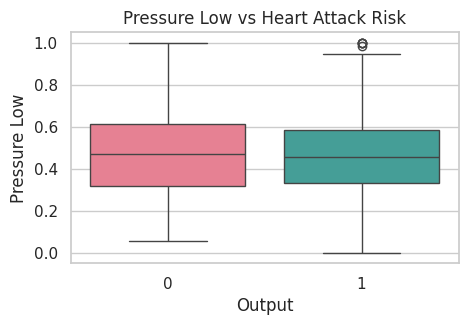

/tmp/ipython-input-1340770349.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Output', y=col, data=data, palette="husl")


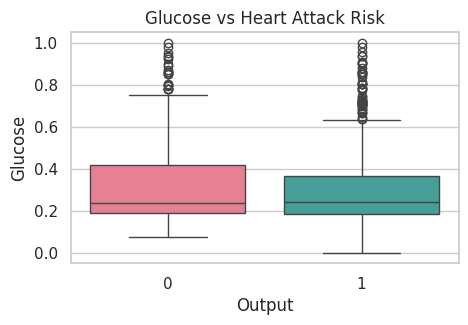

/tmp/ipython-input-1340770349.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Output', y=col, data=data, palette="husl")


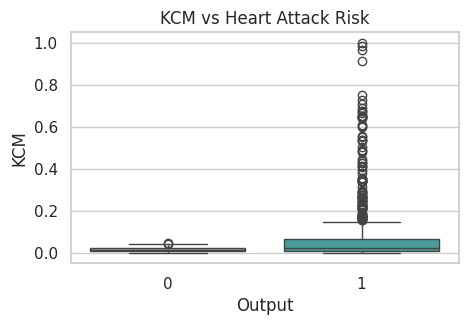

/tmp/ipython-input-1340770349.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Output', y=col, data=data, palette="husl")


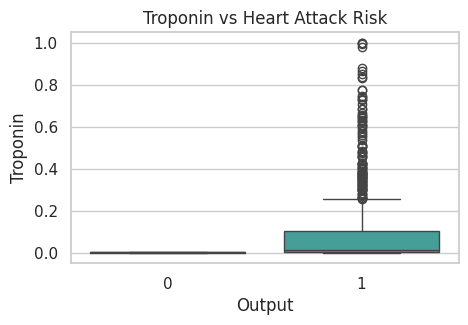

In [44]:

# Gender vs Outcome and Boxplots


# Gender vs Output
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Output', data=data, palette='pastel')
plt.title('Heart Attack Outcome by Gender')
plt.show()

# Boxplots for each feature
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='Output', y=col, data=data, palette="husl")
    plt.title(f'{col} vs Heart Attack Risk')
    plt.show()


# **Model Training**

**Including Relevent Files and Splitting Dataset**

In [45]:

# --- Imports & data split ---
from time import perf_counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Use your DataFrame named `data`
X = data.drop(columns=["Output"])
y = data["Output"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


**Defining models**

In [46]:
# --- Models---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}


<b> Helper function for model evaluation </b>

In [47]:
# --- Train, predict, collect metrics & timings ---
reports = {}            # full classification_report (text)
conf_mats = {}          # confusion matrices
roc_auc = {}            # AUC per model
roc_points = {}         # (fpr, tpr) for plotting
metrics_table_rows = [] # for summary table (with times)

for name, clf in models.items():
    # Train timing
    t0 = perf_counter()
    clf.fit(X_train, y_train)
    train_time = perf_counter() - t0

    # Predict timing (test set)
    t1 = perf_counter()
    y_pred = clf.predict(X_test)
    test_time = perf_counter() - t1

    # Scores for ROC
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)[:, 1]
    else:
        y_score = clf.decision_function(X_test)

    # Text report & confusion matrix
    report_txt = classification_report(y_test, y_pred, digits=3, zero_division=0)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

    # Scalar metrics (test set)
    auc_val = roc_auc_score(y_test, y_score)
    acc = accuracy_score(y_test, y_pred)
    f1w = f1_score(y_test, y_pred, average="weighted", zero_division=0)
    precision_w = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    recall_w = recall_score(y_test, y_pred, average="weighted", zero_division=0)

    # Save per-model artifacts
    reports[name] = report_txt
    conf_mats[name] = cm
    roc_auc[name] = auc_val
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_points[name] = (fpr, tpr)

    # Row for summary table
    metrics_table_rows.append({
        "Model": name,
        "ROC AUC": round(auc_val, 3),
        "Accuracy": round(acc, 3),
        "F1 (weighted)": round(f1w, 3),
        "Precision (weighted)": round(precision_w, 3),
        "Recall (weighted)": round(recall_w, 3),
        "Train Time (s)": round(train_time, 4),
        "Test Time (s)": round(test_time, 4),
    })


**Classification Report of trained Models**

In [48]:
# --- Classification reports (per model) ---
for name, rpt in reports.items():
    print(f"\n=== {name} ===")
    print(rpt)



=== Logistic Regression ===
              precision    recall  f1-score   support

           0      0.704     0.633     0.667       120
           1      0.771     0.822     0.796       180

    accuracy                          0.747       300
   macro avg      0.737     0.728     0.731       300
weighted avg      0.744     0.747     0.744       300


=== Random Forest ===
              precision    recall  f1-score   support

           0      0.968     1.000     0.984       120
           1      1.000     0.978     0.989       180

    accuracy                          0.987       300
   macro avg      0.984     0.989     0.986       300
weighted avg      0.987     0.987     0.987       300


=== Gradient Boosting ===
              precision    recall  f1-score   support

           0      0.967     0.992     0.979       120
           1      0.994     0.978     0.986       180

    accuracy                          0.983       300
   macro avg      0.981     0.985     0.983      

**ROC Curve for trained Models**

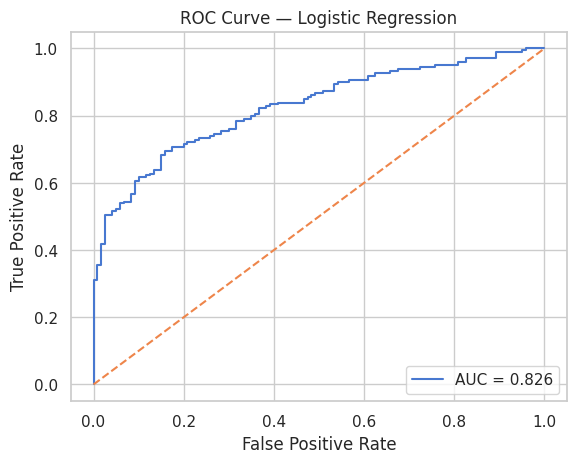

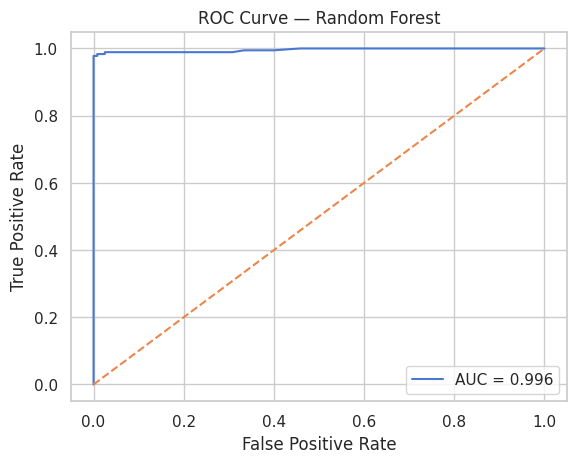

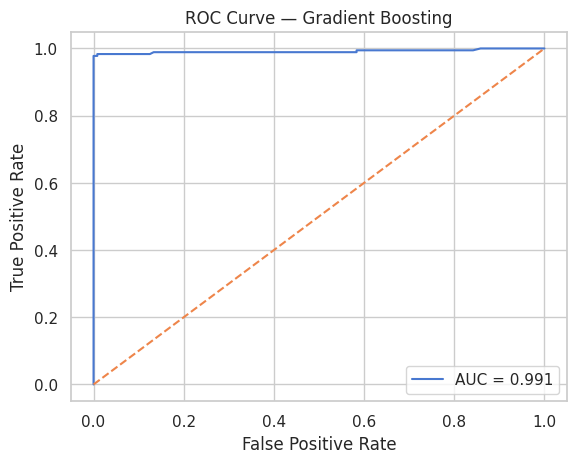

In [49]:
# --- ROC curves (separate figure per model) ---
for name, (fpr, tpr) in roc_points.items():
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc[name]:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve — {name}")
    plt.legend(loc="lower right")
    plt.show()


**Confusion matrices for trained Models**

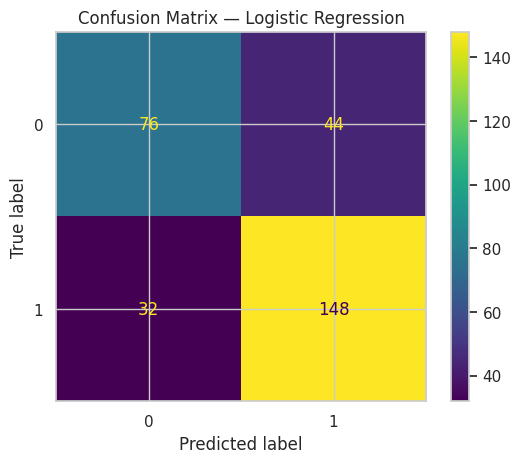

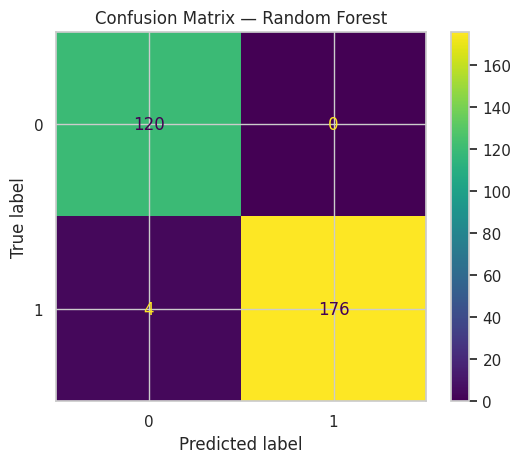

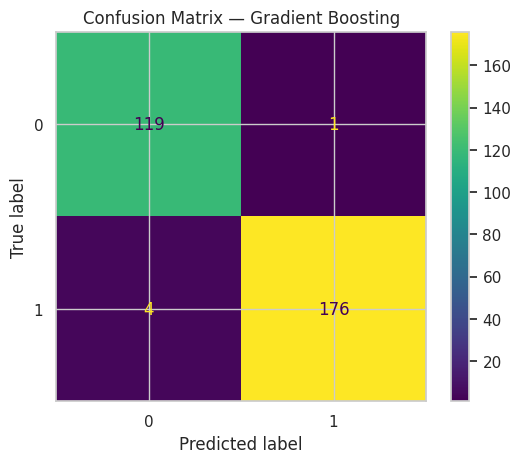

In [50]:
for name, cm in conf_mats.items():
    disp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
    disp.plot(values_format="d")
    plt.title(f"Confusion Matrix — {name}")
    plt.show()


**Summarized Model Performance Metrics**

In [51]:
# --- Summary table with key metrics & timings ---
summary_df = pd.DataFrame(metrics_table_rows).set_index("Model").sort_values("ROC AUC", ascending=False)
print(summary_df)


                     ROC AUC  Accuracy  F1 (weighted)  Precision (weighted)  \
Model                                                                         
Random Forest          0.996     0.987          0.987                 0.987   
Gradient Boosting      0.991     0.983          0.983                 0.984   
Logistic Regression    0.826     0.747          0.744                 0.744   

                     Recall (weighted)  Train Time (s)  Test Time (s)  
Model                                                                  
Random Forest                    0.987          1.7036         0.1556  
Gradient Boosting                0.983          0.6071         0.0038  
Logistic Regression              0.747          0.1138         0.0113  


# Model Robustness: Stratified K-Fold Cross Validation

To validate the stability of our models, we employ Stratified 5-Fold Cross-Validation.

Unlike a simple train-test split, this method splits the data into 5 distinctive parts. It ensures that:

1.  Every patient is used for testing exactly once.
2. The ratio of "Heart Attack" vs. "Safe" patients remains constant across all folds.

This approach provides a more reliable estimate of model performance and proves that our high accuracy is not just due to a "lucky" random split.



In [52]:
from sklearn.model_selection import StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# ---------------------- Helpers (to avoid repetition) ----------------------
def y_scores(clf, X_):
    return clf.predict_proba(X_)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_)

def add_metrics(store, name, y_true, y_pred, y_score, t_train, t_test):
    M = store[name]
    M["auc"].append(roc_auc_score(y_true, y_score))
    M["acc"].append(accuracy_score(y_true, y_pred))
    M["f1w"].append(f1_score(y_true, y_pred, average="weighted", zero_division=0))
    M["precw"].append(precision_score(y_true, y_pred, average="weighted", zero_division=0))
    M["recw"].append(recall_score(y_true, y_pred, average="weighted", zero_division=0))
    M["train_time"].append(t_train); M["test_time"].append(t_test)

def interp_tpr_on_grid(y_true, y_score, grid):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    tpr_i = np.interp(grid, fpr, tpr); tpr_i[0] = 0.0
    return tpr_i

# ---------------------- Accumulators ----------------------
metrics_collect = {name: {"auc":[], "acc":[], "f1w":[], "precw":[], "recw":[], "train_time":[], "test_time":[]} for name in models}
mean_fpr = np.linspace(0, 1, 101)
roc_tprs = {name: [] for name in models}
aggregate_cm = {name: np.zeros((2, 2), dtype=float) for name in models}
oof_true = {name: [] for name in models}
oof_pred = {name: [] for name in models}

# ---------------------- K-Fold loop ----------------------
for fold_idx, (tr, te) in enumerate(skf.split(X, y), 1):
    X_tr, X_te = X.iloc[tr], X.iloc[te]
    y_tr, y_te = y.iloc[tr], y.iloc[te]

    for name, clf in models.items():
        t0 = perf_counter(); clf.fit(X_tr, y_tr); train_time = perf_counter() - t0
        t1 = perf_counter(); y_hat = clf.predict(X_te); test_time = perf_counter() - t1
        y_sc = y_scores(clf, X_te)

        add_metrics(metrics_collect, name, y_te, y_hat, y_sc, train_time, test_time)
        roc_tprs[name].append(interp_tpr_on_grid(y_te, y_sc, mean_fpr))
        aggregate_cm[name] += confusion_matrix(y_te, y_hat, labels=[0, 1])
        oof_true[name].extend(y_te.tolist()); oof_pred[name].extend(y_hat.tolist())

# ---------------------- Summary table (mean ± std) ----------------------
rows = []
for name, M in metrics_collect.items():
    rows.append({
        "Model": name,
        "ROC AUC (mean)": np.mean(M["auc"]),     "ROC AUC (std)": np.std(M["auc"]),
        "Accuracy (mean)": np.mean(M["acc"]),    "Accuracy (std)": np.std(M["acc"]),
        "F1 weighted (mean)": np.mean(M["f1w"]), "F1 weighted (std)": np.std(M["f1w"]),
        "Precision weighted (mean)": np.mean(M["precw"]), "Precision weighted (std)": np.std(M["precw"]),
        "Recall weighted (mean)": np.mean(M["recw"]),     "Recall weighted (std)": np.std(M["recw"]),
        "Train Time (s) mean": np.mean(M["train_time"]),  "Train Time (s) std": np.std(M["train_time"]),
        "Test Time (s) mean": np.mean(M["test_time"]),    "Test Time (s) std": np.std(M["test_time"]),
    })
summary_kfold = pd.DataFrame(rows).set_index("Model").round(4).sort_values("ROC AUC (mean)", ascending=False)
print(summary_kfold)

                     ROC AUC (mean)  ROC AUC (std)  Accuracy (mean)  \
Model                                                                 
Random Forest                0.9967         0.0036           0.9875   
Gradient Boosting            0.9953         0.0043           0.9842   
Logistic Regression          0.8372         0.0186           0.7463   

                     Accuracy (std)  F1 weighted (mean)  F1 weighted (std)  \
Model                                                                        
Random Forest                0.0059              0.9875             0.0059   
Gradient Boosting            0.0072              0.9842             0.0071   
Logistic Regression          0.0215              0.7403             0.0223   

                     Precision weighted (mean)  Precision weighted (std)  \
Model                                                                      
Random Forest                           0.9878                    0.0057   
Gradient Boosting        

# **Hyperparameter optimization of the models using Randomized Search**


**Defining Parameter Grid for Random Search**

In [55]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
# Define parameter grids for Random Search
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 0.9, 1.0]
    }
}

**Displaying Classification Report and Best configuration for Models**

In [56]:
best_estimators = {}

for name, model in models.items():
    print(f"--- Optimizing {name} ---")

    # Initialize RandomizedSearchCV
    rs = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[name],
        n_iter=10,  # Number of parameter settings that are sampled
        cv=5,       # 5-fold cross-validation during search
        scoring='accuracy',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )

    # Fit the random search model
    rs.fit(X_train, y_train)

    # Store the best model
    best_estimators[name] = rs.best_estimator_

    # Display Best Configuration
    print(f"Best Parameters for {name}: {rs.best_params_}")
    print(f"Best CV Score: {rs.best_score_:.4f}")

    # Evaluate on Test Data
    y_pred = rs.best_estimator_.predict(X_test)
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("="*50 + "\n")

--- Optimizing Logistic Regression ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Logistic Regression: {'solver': 'liblinear', 'C': 100}
Best CV Score: 0.8419

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.75      0.89      0.82       120
           1       0.92      0.81      0.86       180

    accuracy                           0.84       300
   macro avg       0.84      0.85      0.84       300
weighted avg       0.85      0.84      0.84       300


--- Optimizing Random Forest ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best CV Score: 0.9900

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       120
           1       1.00      0.98    

**Display Confusion Matrix and ROC Curve after hyperparameter optimization**

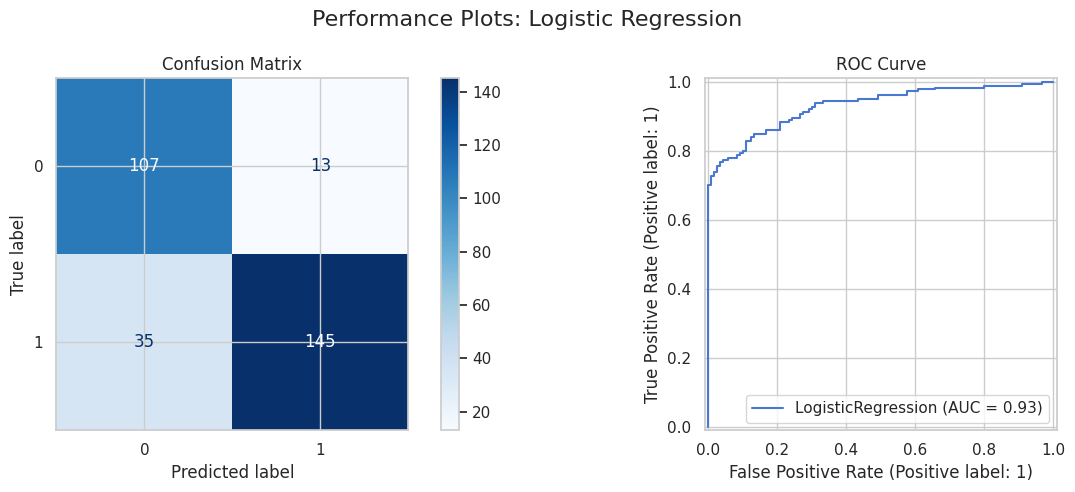

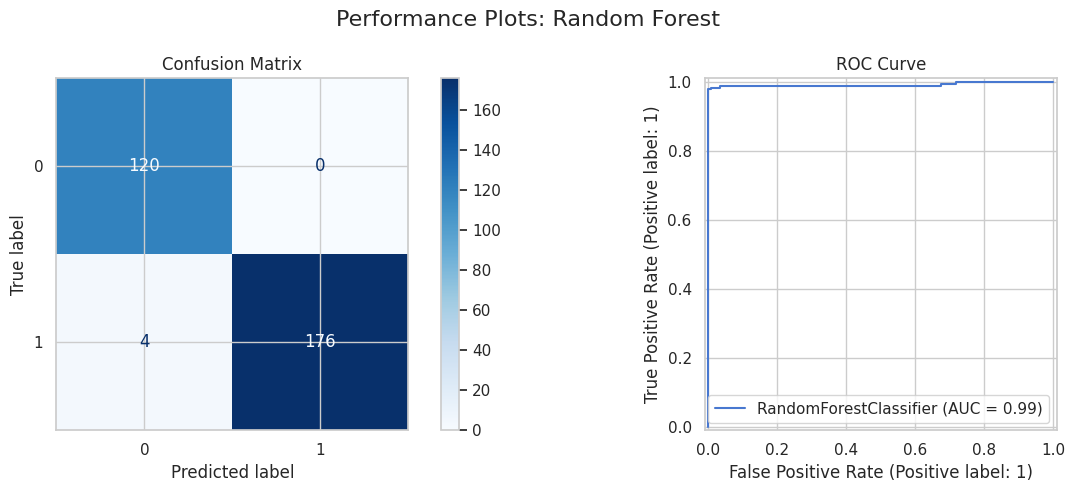

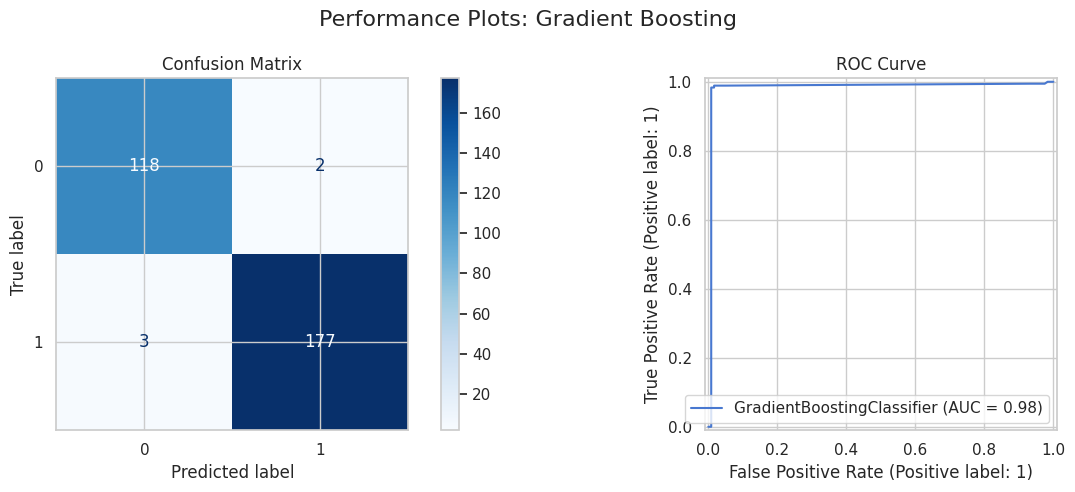

In [57]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
for name, model in best_estimators.items():
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"Performance Plots: {name}", fontsize=16)

    # 1. Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        ax=ax[0]
    )
    ax[0].set_title("Confusion Matrix")

    # 2. ROC Curve
    # Note: ROC curves are generally for binary classification.
    # If multiclass, you need to binarize output or use OneVsRest strategy.
    RocCurveDisplay.from_estimator(
        model,
        X_test,
        y_test,
        ax=ax[1]
    )
    ax[1].set_title("ROC Curve")
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

**Strtified K-fold Cross validation after hyperparameter optimization**


In [58]:
print("--- Stratified K-Fold Cross Validation (10 Folds) ---")

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for name, model in best_estimators.items():
    # We use the full dataset (X + y) ideally, or X_train/y_train if preserving holdout
    # Assuming X and y are your full feature/target sets:
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')

    print(f"{name}:")
    print(f"  Mean Accuracy: {scores.mean():.4f}")
    print(f"  Standard Deviation: {scores.std():.4f}")
    print("-" * 30)

--- Stratified K-Fold Cross Validation (10 Folds) ---
Logistic Regression:
  Mean Accuracy: 0.8485
  Standard Deviation: 0.0414
------------------------------
Random Forest:
  Mean Accuracy: 0.9878
  Standard Deviation: 0.0078
------------------------------
Gradient Boosting:
  Mean Accuracy: 0.9900
  Standard Deviation: 0.0078
------------------------------


# **Identifying Strongest Clinical Predictors**

To answer Research Question 2, we analyze the Feature Importance scores extracted from the Random Forest model.

Unlike correlation (which only shows linear relationships), Feature Importance measures how much each clinical variable contributes to reducing uncertainty (impurity) in the model's decision trees.

This analysis allows us to:



1.   Identify which biomarkers (e.g., Troponin, Glucose) are the primary
drivers of heart attack risk.
2.  Compare these findings with established medical literature to validate the model's clinical relevance.





/tmp/ipython-input-3397002758.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


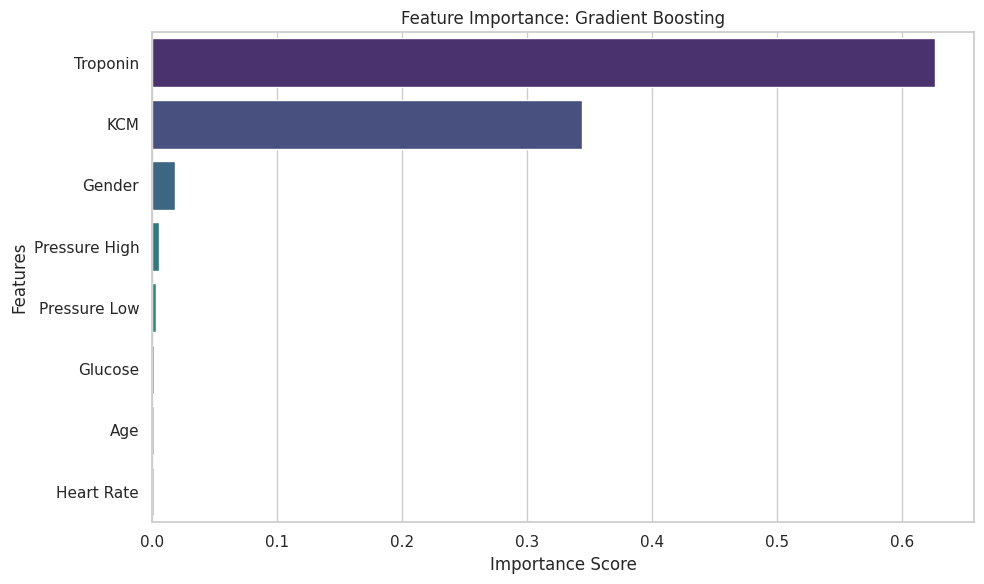

Top 5 Most Important Features:
         Feature  Importance
7       Troponin    0.626551
6            KCM    0.343609
1         Gender    0.017806
3  Pressure High    0.005475
4   Pressure Low    0.002536


In [59]:
# --- RQ 2: Feature Importance Analysis ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

best_model_name = "Gradient Boosting"
best_model = best_estimators[best_model_name]

# 2. Extract Feature Importances
# Note: This assumes X_train is a Pandas DataFrame.
# If X_train is a numpy array, replace X_train.columns with a list of your feature names.
importances = best_model.feature_importances_
feature_names = X_train.columns

# 3. Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 4. Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

plt.title(f'Feature Importance: {best_model_name}')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Optional: Print top 5 features textually
print("Top 5 Most Important Features:")
print(feature_importance_df.head(5))

# Model Interpretability (SHAP Analysis)
To answer Research Question 3, we move beyond accuracy metrics and analyze how the model makes decisions. We use SHAP (SHapley Additive exPlanations) to explain the output of the Random Forest model.

This analysis provides two key insights:


1.   Feature Importance (Bar Plot): Which clinical variables (e.g., Troponin, Age) are the biggest drivers of risk?
2.  Directionality (Summary Plot): Does a high value of a feature (e.g., High Blood Pressure) increase or decrease the risk of a heart attack?


*Note: Red dots indicate high feature values, while Blue dots indicate low values. Dots on the right side indicate a higher predicted risk of heart attack.*

Generating Enhanced SHAP Summary Plot...


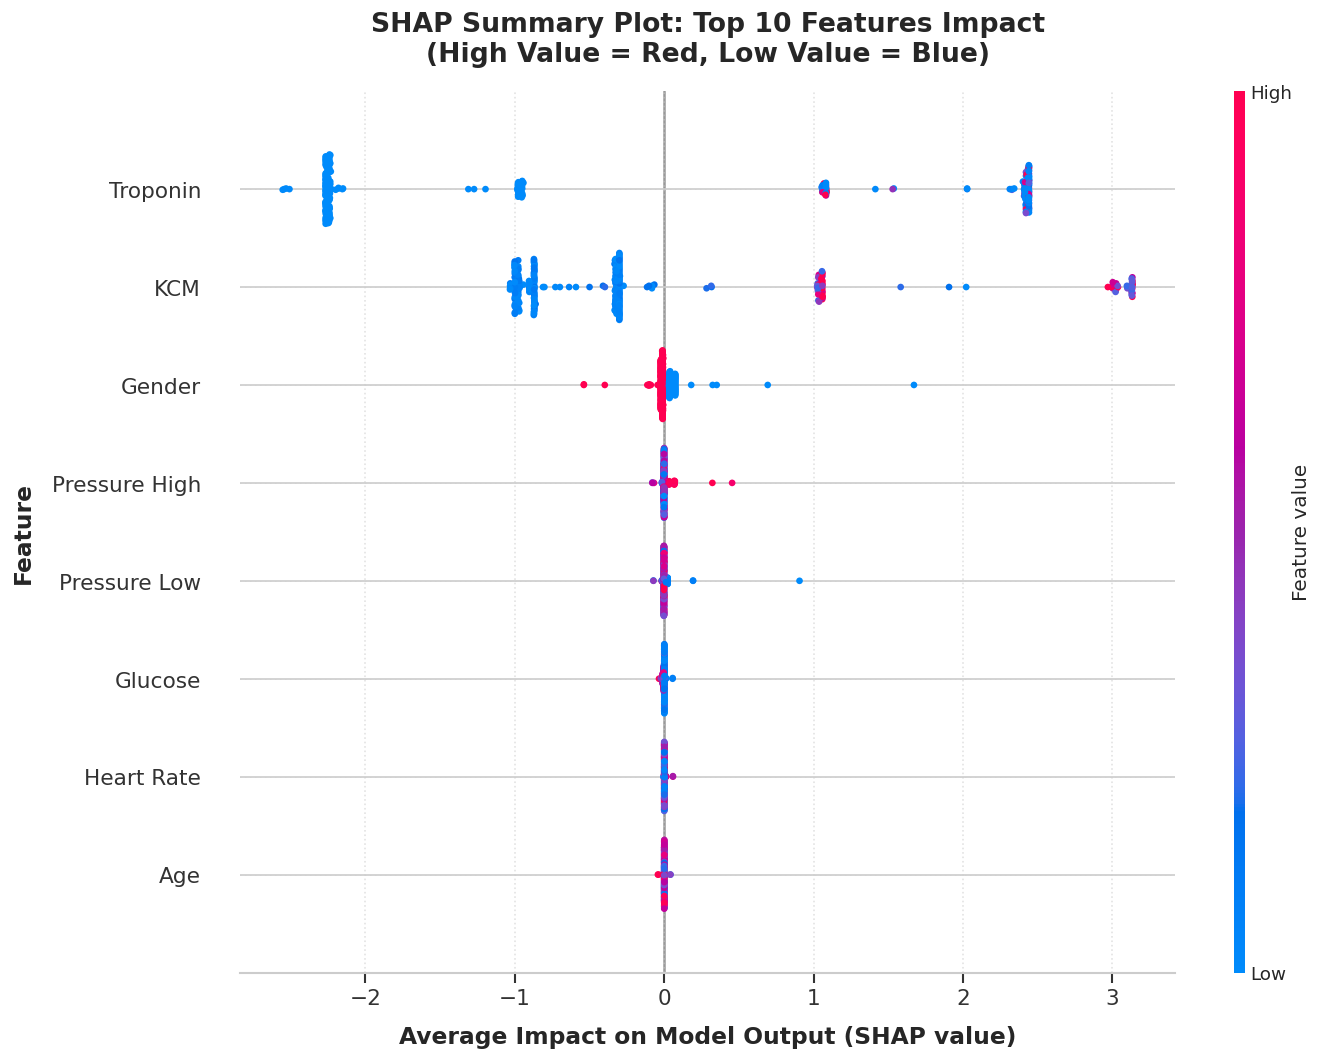


Generating Waterfall Plot for the First Test Observation...


/tmp/ipython-input-2861760440.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  base_val = float(explainer.expected_value[0] if len(explainer.expected_value) > 1 else explainer.expected_value)


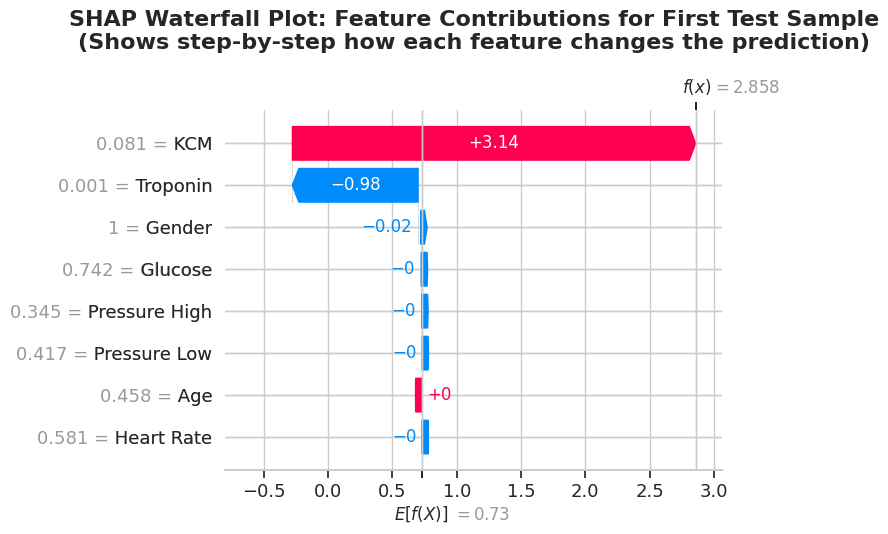

✓ Waterfall plot generated successfully!

Generating Bar Plot for First Test Observation...


/tmp/ipython-input-2861760440.py:98: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  base_val = float(explainer.expected_value[0] if len(explainer.expected_value) > 1 else explainer.expected_value)


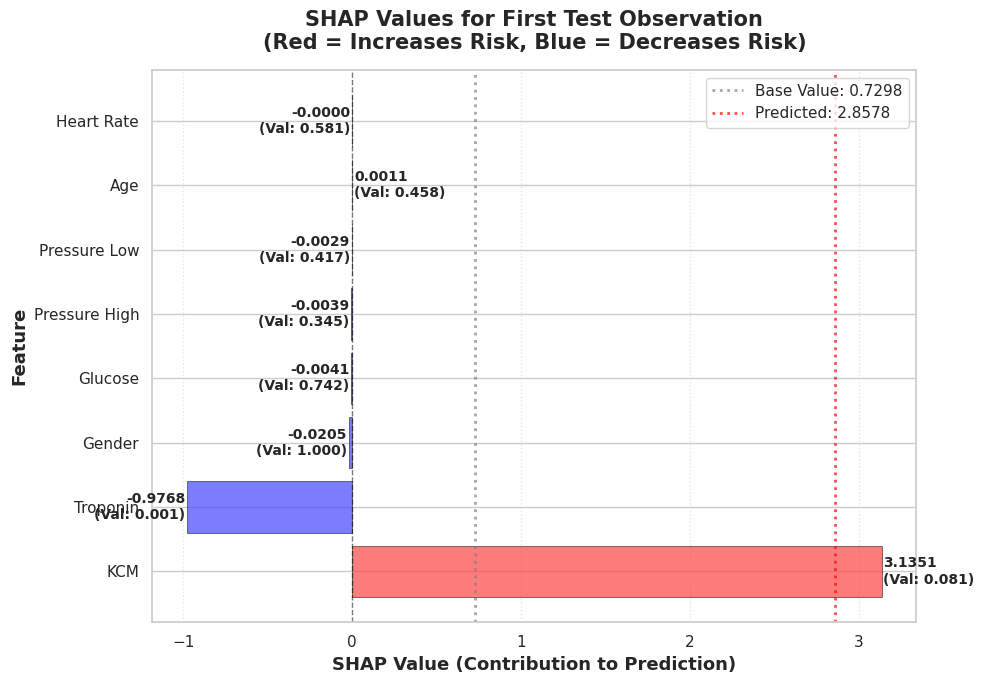


Generating Interactive HTML Force Plot (saved to file)...
Note: Interactive HTML plot could not be generated (write() argument must be str, not dict).

Detailed SHAP Value Contributions for First Test Observation:
Base Value (Expected Model Output for average sample): 0.7298
Predicted Value for This Sample:                   2.8578

Feature            |      Value |  SHAP Value |     Impact | Contribution
--------------------------------------------------------------------------------
KCM                |     0.0808 |      3.1351 |     3.1351 | ↑ Increases Risk
Troponin           |     0.0010 |     -0.9768 |     0.9768 | ↓ Decreases Risk
Gender             |     1.0000 |     -0.0205 |     0.0205 | ↓ Decreases Risk
Glucose            |     0.7417 |     -0.0041 |     0.0041 | ↓ Decreases Risk
Pressure High      |     0.3453 |     -0.0039 |     0.0039 | ↓ Decreases Risk
Pressure Low       |     0.4167 |     -0.0029 |     0.0029 | ↓ Decreases Risk
Age                |     0.4583 |      0.

/tmp/ipython-input-2861760440.py:158: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


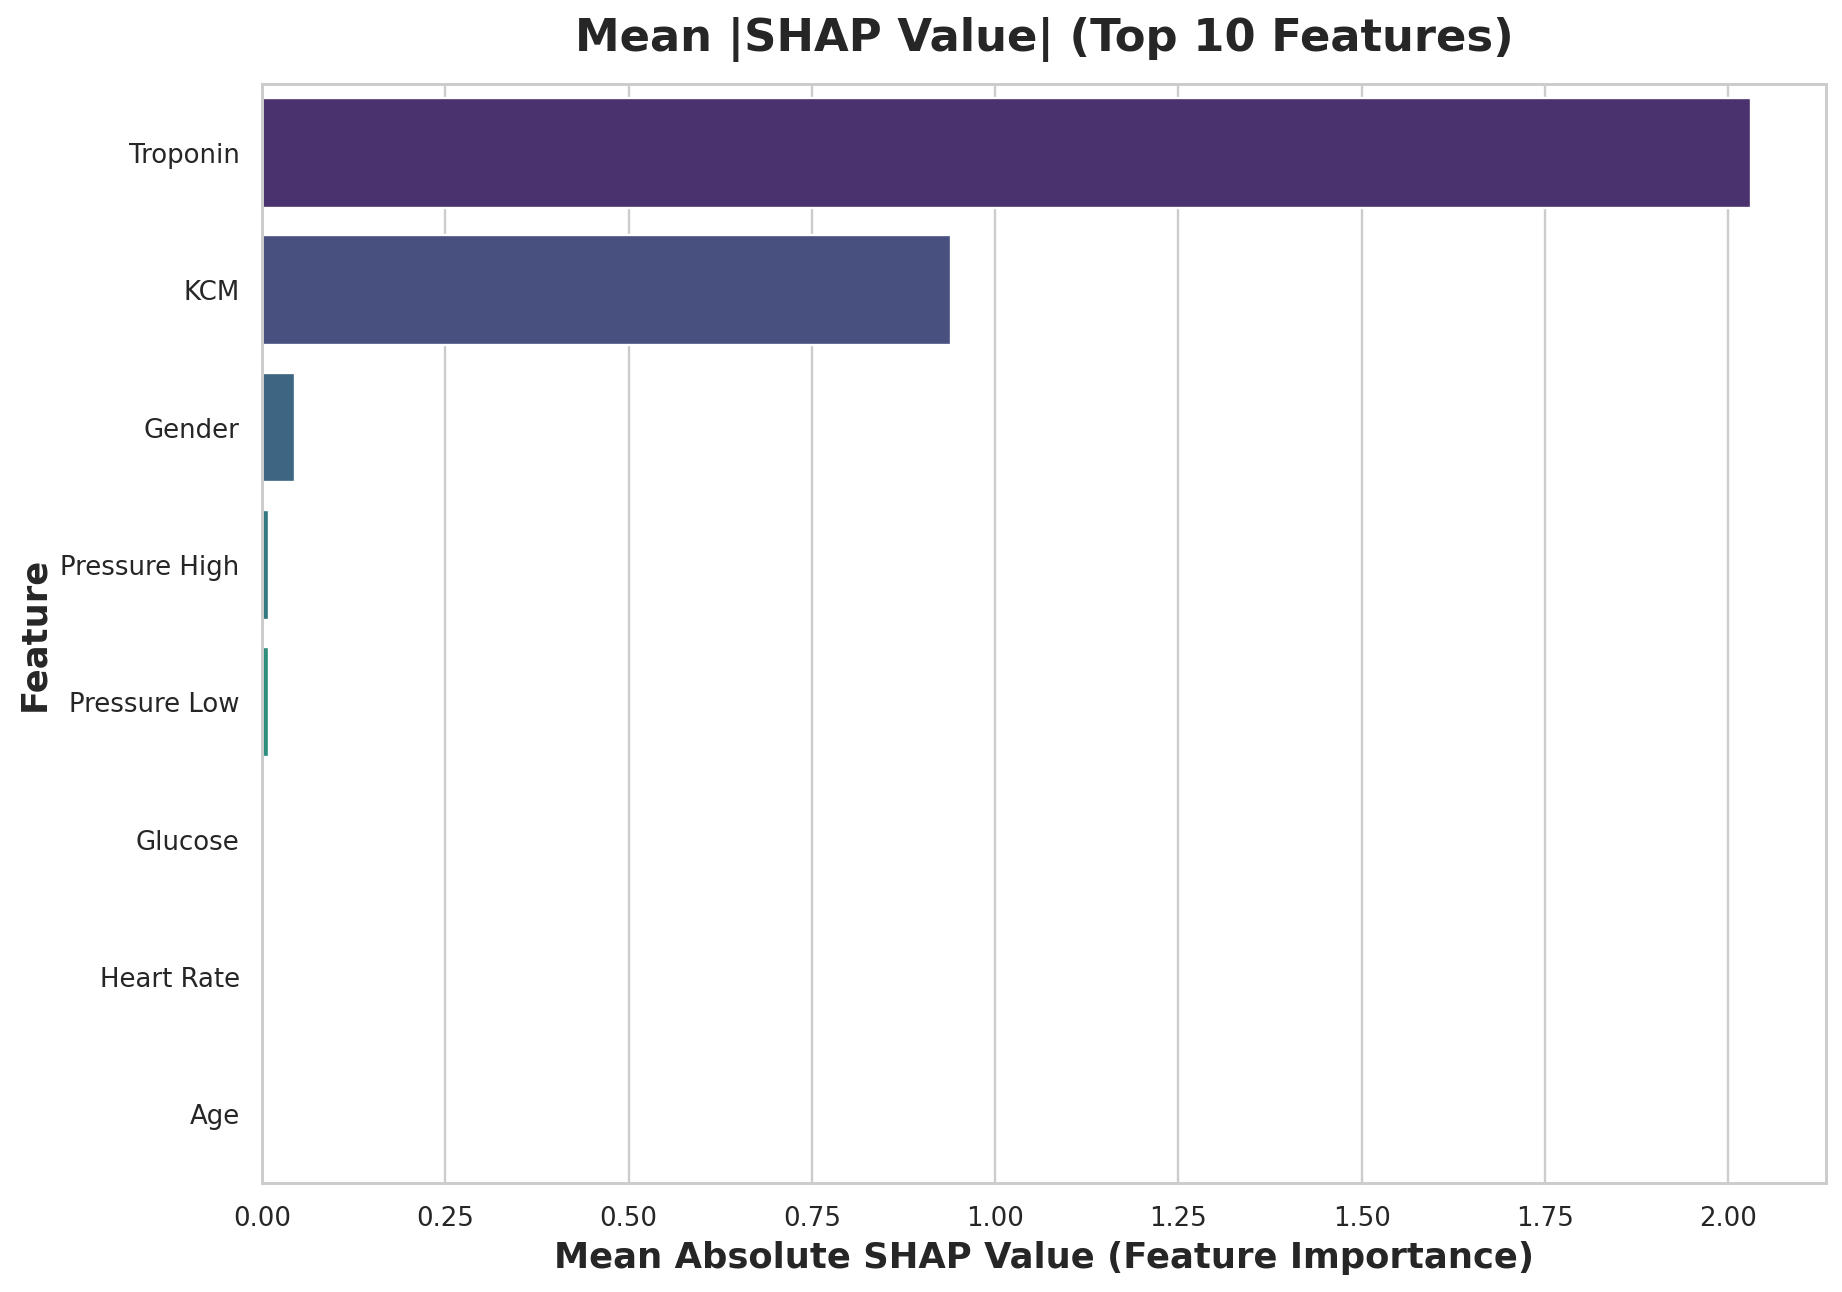

In [60]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

shap.initjs()

explainer = shap.TreeExplainer(best_estimators["Gradient Boosting"])

shap_values = explainer.shap_values(X_test)

# --- Enhanced SHAP Summary Plot (Beeswarm) ---
print("Generating Enhanced SHAP Summary Plot...")
plt.figure(figsize=(12, 9), dpi=120)
custom_font = {'fontweight': 'bold', 'fontsize': 16}
shap.summary_plot(
    shap_values,
    X_test,
    show=False,
    plot_size=(12, 9),
    color_bar=True,
    max_display=10, # Show top 10 features for clarity
)
plt.title("SHAP Summary Plot: Top 10 Features Impact\n(High Value = Red, Low Value = Blue)", **custom_font, pad=18)
plt.xlabel('Average Impact on Model Output (SHAP value)', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Feature', fontsize=14, fontweight='bold', labelpad=10)
plt.tick_params(axis='y', labelsize=13)
plt.tick_params(axis='x', labelsize=13)
plt.grid(axis='x', linestyle=':', alpha=0.55)
plt.tight_layout()
plt.show()

print("\nGenerating Waterfall Plot for the First Test Observation...")
print("=" * 100)

try:
    if isinstance(shap_values, list):
        shap_vals = shap_values[1][0, :]  # For binary, use class 1
    else:
        shap_vals = shap_values[0, :]

    # Get expected value (handle array case)
    if isinstance(explainer.expected_value, np.ndarray):
        base_val = float(explainer.expected_value[0] if len(explainer.expected_value) > 1 else explainer.expected_value)
    else:
        base_val = float(explainer.expected_value)

    shap_explanation = shap.Explanation(
        values=shap_vals,
        base_values=base_val,
        data=X_test.iloc[0, :].values,
        feature_names=X_test.columns.tolist()
    )

    # Waterfall plot - much clearer visualization
    plt.figure(figsize=(12, 8))
    shap.plots.waterfall(shap_explanation, show=False, max_display=10)
    plt.title("SHAP Waterfall Plot: Feature Contributions for First Test Sample\n(Shows step-by-step how each feature changes the prediction)",
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    print("✓ Waterfall plot generated successfully!")
except Exception as e:
    print(f"Note: Waterfall plot could not be generated ({str(e)}). Using bar plot instead.")

print("\nGenerating Bar Plot for First Test Observation...")
print("=" * 100)

if isinstance(shap_values, list):
    shap_vals_for_plot = shap_values[1][0, :]  # For binary, use class 1
else:
    shap_vals_for_plot = shap_values[0, :]

shap_df = pd.DataFrame({
    'Feature': X_test.columns,
    'SHAP Value': shap_vals_for_plot,
    'Feature Value': X_test.iloc[0, :].values
}).sort_values('SHAP Value', key=abs, ascending=False)

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
colors = ['#ff4444' if x > 0 else '#4444ff' for x in shap_df['SHAP Value']]
bars = ax.barh(shap_df['Feature'], shap_df['SHAP Value'], color=colors, alpha=0.7, edgecolor='black', linewidth=0.5)

# Add value labels on bars
for i, (idx, row) in enumerate(shap_df.iterrows()):
    value = row['SHAP Value']
    ax.text(value + (0.01 if value > 0 else -0.01), i,
            f'{value:.4f}\n(Val: {row["Feature Value"]:.3f})',
            va='center', ha='left' if value > 0 else 'right',
            fontsize=10, fontweight='bold')

ax.axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=0.5)


if isinstance(explainer.expected_value, np.ndarray):
    base_val = float(explainer.expected_value[0] if len(explainer.expected_value) > 1 else explainer.expected_value)
else:
    base_val = float(explainer.expected_value)
pred_val = float(base_val + shap_vals_for_plot.sum())
ax.axvline(x=base_val, color='gray', linestyle=':', linewidth=2, alpha=0.7, label=f'Base Value: {base_val:.4f}')
ax.axvline(x=pred_val, color='red', linestyle=':', linewidth=2, alpha=0.7, label=f'Predicted: {pred_val:.4f}')

ax.set_xlabel('SHAP Value (Contribution to Prediction)', fontsize=13, fontweight='bold')
ax.set_ylabel('Feature', fontsize=13, fontweight='bold')
ax.set_title('SHAP Values for First Test Observation\n(Red = Increases Risk, Blue = Decreases Risk)',
             fontsize=15, fontweight='bold', pad=15)
ax.legend(loc='best', fontsize=11)
ax.grid(axis='x', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

print("\nGenerating Interactive HTML Force Plot (saved to file)...")
print("=" * 100)
try:
    shap_html = shap.plots.force(
        base_val,
        shap_vals_for_plot,
        X_test.iloc[0, :],
        matplotlib=False,  # Use HTML/JS version
        show=False
    )
    # Save to HTML file
    with open("shap_force_plot_interactive.html", "w", encoding="utf-8") as f:
        f.write(shap_html.data)
    print("✓ Interactive plot saved as 'shap_force_plot_interactive.html' - open in browser for best experience!")
except Exception as e:
    print(f"Note: Interactive HTML plot could not be generated ({str(e)}).")

# --- Detailed Table-style SHAP Value ---
print("\n" + "=" * 100)
print("Detailed SHAP Value Contributions for First Test Observation:")
print("=" * 100)
print(f"{'Base Value (Expected Model Output for average sample):':50s} {base_val:.4f}")
print(f"{'Predicted Value for This Sample:':50s} {pred_val:.4f}\n")

shap_df_table = pd.DataFrame({
    'Feature': X_test.columns,
    'Feature Value': X_test.iloc[0, :].values,
    'SHAP Value': shap_vals_for_plot,
    'Absolute Impact': np.abs(shap_vals_for_plot)
}).sort_values('Absolute Impact', ascending=False)

print(f"{'Feature':18} | {'Value':>10} | {'SHAP Value':>11} | {'Impact':>10} | Contribution")
print("-" * 80)

for idx, row in shap_df_table.iterrows():
    direction = "↑ Increases Risk" if row['SHAP Value'] > 0 else "↓ Decreases Risk"
    print(f"{row['Feature']:18.18s} | {row['Feature Value']:10.4f} | {row['SHAP Value']:11.4f} | "
          f"{row['Absolute Impact']:10.4f} | {direction}")

print("=" * 80)

mean_abs_shap = np.abs(shap_values).mean(axis=0)
top_idx = np.argsort(mean_abs_shap)[-10:][::-1]
plt.figure(figsize=(11, 8), dpi=170)
sns.barplot(
    y=np.array(X_test.columns)[top_idx],
    x=mean_abs_shap[top_idx],
    palette="viridis"
)
plt.title("Mean |SHAP Value| (Top 10 Features)", fontsize=19, fontweight='bold', pad=14)
plt.xlabel("Mean Absolute SHAP Value (Feature Importance)", fontsize=15, fontweight='bold')
plt.ylabel("Feature", fontsize=15, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()